Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns

In [2]:
card = pd.read_csv('Credit_card.csv')

In [3]:
card

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [4]:
card.rename(columns={'Propert_Owner': 'Property_Owner'}, inplace=True)

In [5]:
card.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Property_Owner       0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [6]:
card.drop(columns=['Ind_ID'], inplace=True)
card.drop(columns=['Type_Occupation'], inplace=True) # there are 17 different occupations
card.dropna(inplace=True)

In [7]:
card.isna().sum()

GENDER            0
Car_Owner         0
Property_Owner    0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
dtype: int64

Looking at the shape of our dataset - It has 150 rows and 4 columns




In [8]:
card.shape

(1496, 16)

In [9]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1547
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          1496 non-null   object 
 1   Car_Owner       1496 non-null   object 
 2   Property_Owner  1496 non-null   object 
 3   CHILDREN        1496 non-null   int64  
 4   Annual_income   1496 non-null   float64
 5   Type_Income     1496 non-null   object 
 6   EDUCATION       1496 non-null   object 
 7   Marital_status  1496 non-null   object 
 8   Housing_type    1496 non-null   object 
 9   Birthday_count  1496 non-null   float64
 10  Employed_days   1496 non-null   int64  
 11  Mobile_phone    1496 non-null   int64  
 12  Work_Phone      1496 non-null   int64  
 13  Phone           1496 non-null   int64  
 14  EMAIL_ID        1496 non-null   int64  
 15  Family_Members  1496 non-null   int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 198.7+ KB


**Visualizations**

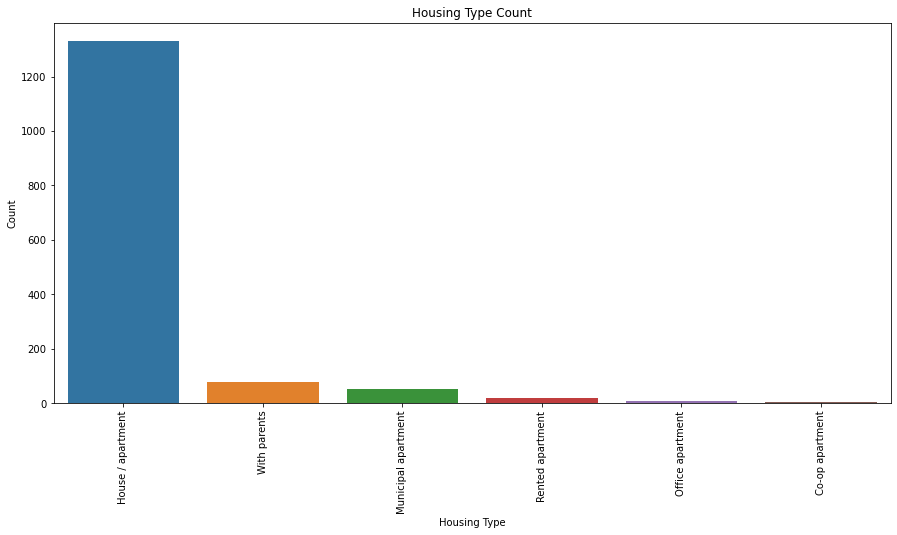

In [10]:
plt.figure(figsize=(15,7))
house = card['Housing_type'].value_counts().index
sns.barplot(x = house, y = card['Housing_type'].value_counts().values)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Housing Type Count')
plt.xticks(rotation=90)
plt.show()

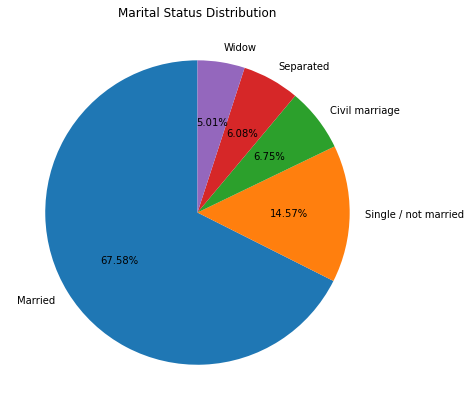

In [11]:
plt.figure(figsize=(15, 7))

marital_counts = card['Marital_status'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.2f%%', startangle=90)

plt.title('Marital Status Distribution')
plt.show()

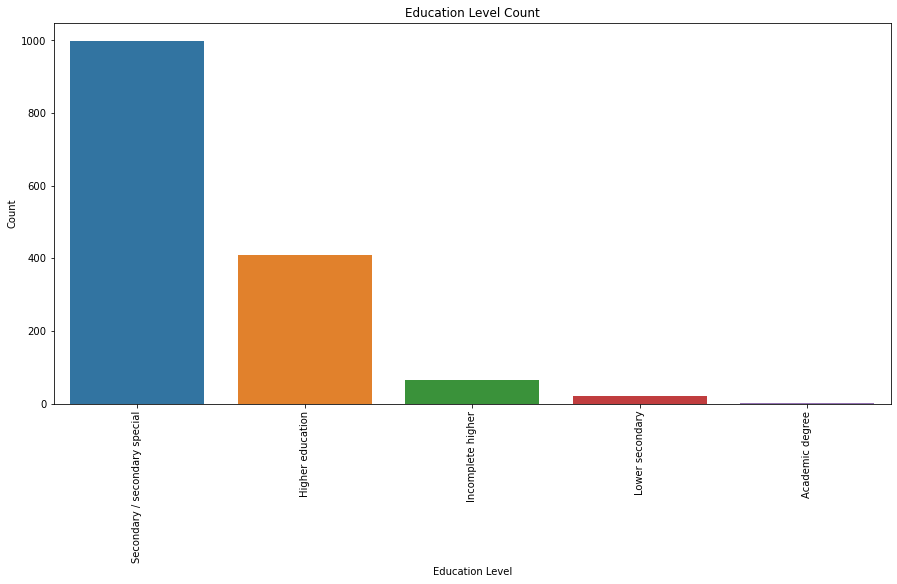

In [12]:
plt.figure(figsize=(15, 7))
education_counts = card['EDUCATION'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Count')
plt.xticks(rotation = 90)
plt.show()

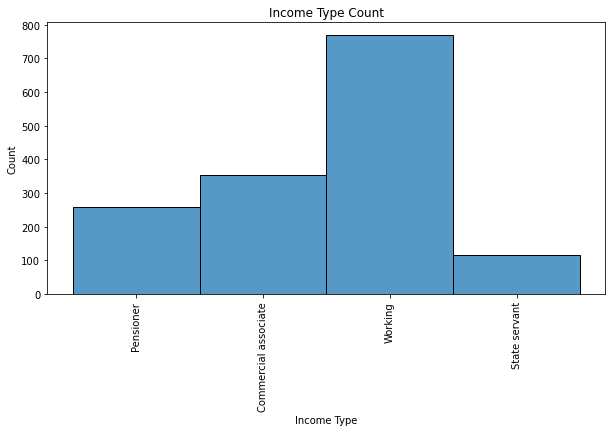

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(card['Type_Income'])
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Income Type Count')
plt.xticks(rotation = 90)
plt.show()

**One Hot Encoding**

In [14]:
#1) Gender
gender_encoding = pd.get_dummies(card['GENDER'], drop_first=True)

In [15]:
card = card.drop('GENDER', axis=1)

In [16]:
card = card.join(gender_encoding)

In [17]:
#2) Own Property
property_encoding = pd.get_dummies(card['Property_Owner'], drop_first=True)
card = card.drop('Property_Owner', axis=1)
card = card.join(property_encoding)

In [18]:
card.rename(columns={'M': 'Male'}, inplace=True)
card.rename(columns={'Y': 'Property_Owner'}, inplace=True)

In [19]:
#3) Income Type: Commercial associate, Pensioner, State servant,Working
income_type_encoding = pd.get_dummies(card['Type_Income'])
card = card.drop('Type_Income', axis = 1)
card = card.join(income_type_encoding)

In [20]:
#4) Education
education_encoding = pd.get_dummies(card['EDUCATION'])
card = card.drop('EDUCATION', axis = 1)
card = card.join(education_encoding)

In [21]:
#5) Marital Status
martial_encoding = pd.get_dummies(card['Marital_status'])
card = card.drop('Marital_status', axis = 1)
card = card.join(martial_encoding)

In [22]:
#6) Housing Type
housing_encoding = pd.get_dummies(card['Housing_type'])
card = card.drop('Housing_type', axis = 1)
card = card.join(housing_encoding)

In [23]:
card

,Car_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,Y,0,180000.0,-18772.0,365243,1,0,0,0,2,...,1,0,0,0,0,1,0,0,0,0
1,Y,0,315000.0,-13557.0,-586,1,1,1,0,2,...,1,0,0,0,0,1,0,0,0,0
4,Y,0,315000.0,-13557.0,-586,1,1,1,0,2,...,1,0,0,0,0,1,0,0,0,0
6,Y,0,315000.0,-13557.0,-586,1,1,1,0,2,...,1,0,0,0,0,1,0,0,0,0
7,N,0,180000.0,-22134.0,365243,1,0,0,0,2,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,Y,1,360000.0,-11294.0,-3536,1,0,1,0,3,...,1,0,0,0,0,1,0,0,0,0
1544,N,0,225000.0,-10229.0,-1209,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1545,Y,2,180000.0,-13174.0,-2477,1,0,0,0,4,...,1,0,0,0,0,1,0,0,0,0
1546,Y,0,270000.0,-15292.0,-645,1,1,1,0,2,...,0,0,0,0,0,1,0,0,0,0


In [24]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1547
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Car_Owner                      1496 non-null   object 
 1   CHILDREN                       1496 non-null   int64  
 2   Annual_income                  1496 non-null   float64
 3   Birthday_count                 1496 non-null   float64
 4   Employed_days                  1496 non-null   int64  
 5   Mobile_phone                   1496 non-null   int64  
 6   Work_Phone                     1496 non-null   int64  
 7   Phone                          1496 non-null   int64  
 8   EMAIL_ID                       1496 non-null   int64  
 9   Family_Members                 1496 non-null   int64  
 10  Male                           1496 non-null   uint8  
 11  Property_Owner                 1496 non-null   uint8  
 12  Commercial associate           1496 non-null   u

In [25]:
# getting list of column names

card.columns.values.tolist()

['Car_Owner',
 'CHILDREN',
 'Annual_income',
 'Birthday_count',
 'Employed_days',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Family_Members',
 'Male',
 'Property_Owner',
 'Commercial associate',
 'Pensioner',
 'State servant',
 'Working',
 'Academic degree',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Secondary / secondary special',
 'Civil marriage',
 'Married',
 'Separated',
 'Single / not married',
 'Widow',
 'Co-op apartment',
 'House / apartment',
 'Municipal apartment',
 'Office apartment',
 'Rented apartment',
 'With parents']

Separating the features from the labels

In [26]:
#.values is used to extract the dataframe values to a numpy array

# specifing all the columns you want is equivalent to dropping the columns you don't want 
X = card.drop(['Car_Owner'], axis = 1).values
y = card[['Car_Owner']].values

Splitting the Dataset into Training and Test Sets


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [28]:
X_train

array([[ 0.0000e+00,  1.7325e+05, -1.6273e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  1.8000e+05, -9.8100e+03, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 1.0000e+00,  2.3175e+05, -1.4247e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       ...,
       [ 0.0000e+00,  1.3500e+05, -1.3211e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 1.0000e+00,  2.2500e+05, -1.0909e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  9.9000e+04, -2.1030e+04, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00]])

Feature Scaling - One method to rescale data is to standardize it.

To standardize a dataset means to scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1.


In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting (Training) the model to the training dataset

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # recall #f1
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn import svm

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

Performing 5-Fold Cross Validation for KNN

In [31]:
k = 5 # 5 splits
kf = KFold(n_splits=k)

result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Average accuracy:{result.mean()}')

 Average accuracy:0.6399088630667578


Performing 5-Fold Cross Validation for GNB

In [32]:
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.39727956254272045


Performing 5-Fold Cross Validation on a Linear SVM

In [33]:
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6944087491455913


Performing 5 Fold Cross Validation on a RBF SVM

In [34]:
result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.660952380952381


Performing 5 fold Cross Validation on Poly SVM

In [35]:
result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6504625199362042


Performing 5 Fold Cross Validation on Sigmoid SVM

In [36]:
result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.688671679197995


Performing Stratified 10-Fold Cross Validation for KNN

In [37]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

result = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy: {result.mean()}')

 Avg accuracy: 0.6446794871794872


Performing Stratified 10-Fold Cross Validation for GNB

In [38]:
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.3972710622710623


In [39]:
# Performing Stratified 10-Fold Cross validation on Linear SVM

result = cross_val_score(linear, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6972435897435897


In [40]:
# Performing Stratified 10-Fold Cross validation on RBF SVM

result = cross_val_score(rbf, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6572252747252747


In [41]:
# Stratfied KFold on Poly SVM

result = cross_val_score(poly, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.646584249084249


In [42]:
# Stratified KFold on Sigmoid SVM

result = cross_val_score(sig, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6772069597069597


Using the model to make predictions on the test dataset

In [43]:
# KNN: Predicting the Test set results

y_pred_knn = knn.predict(X_test)

In [44]:
# GNB - Using the model to make predictions on the test dataset

y_pred_gnb = gnb.predict(X_test)

In [45]:
# KNN - Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           N       0.67      0.77      0.72       259
           Y       0.61      0.48      0.54       190

    accuracy                           0.65       449
   macro avg       0.64      0.63      0.63       449
weighted avg       0.64      0.65      0.64       449



In [46]:
# GNB - Classification Report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           N       1.00      0.02      0.03       259
           Y       0.43      1.00      0.60       190

    accuracy                           0.43       449
   macro avg       0.71      0.51      0.31       449
weighted avg       0.76      0.43      0.27       449



In [47]:
# Linear SVM Classification Report
svm_linear_pred = linear.predict(X_test)

print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

           N       0.72      0.82      0.76       259
           Y       0.69      0.56      0.62       190

    accuracy                           0.71       449
   macro avg       0.70      0.69      0.69       449
weighted avg       0.71      0.71      0.70       449



In [48]:
# Poly SVM Classification Report
svm_poly_pred = poly.predict(X_test)

print(classification_report(y_test, svm_poly_pred))

              precision    recall  f1-score   support

           N       0.64      0.90      0.75       259
           Y       0.69      0.31      0.42       190

    accuracy                           0.65       449
   macro avg       0.66      0.60      0.59       449
weighted avg       0.66      0.65      0.61       449



In [49]:
# Sig SVM Classification Report
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))

              precision    recall  f1-score   support

           N       0.68      0.83      0.75       259
           Y       0.66      0.47      0.55       190

    accuracy                           0.67       449
   macro avg       0.67      0.65      0.65       449
weighted avg       0.67      0.67      0.66       449



In [50]:
# RBF SVM Classification Report
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

           N       0.63      0.90      0.74       259
           Y       0.68      0.29      0.41       190

    accuracy                           0.64       449
   macro avg       0.66      0.59      0.57       449
weighted avg       0.65      0.64      0.60       449



How does the value of accuracy change in relation to K?

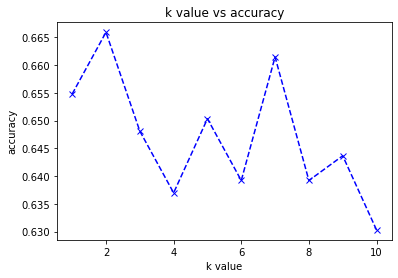

 Average accuracy:0.649501025290499


In [51]:
from sklearn.metrics import accuracy_score
accuracy = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.ravel())
    y_pred_knn = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred_knn.ravel()))
plt.plot(list(range(1,11)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()


k = 5 # 5 splits
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Average accuracy:{result.mean()}')

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Training a Decision Tree classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
# Decision Tree - Making Predictions
y_pred_dt = dt.predict(X_test)

In [55]:
# Decision Tree - Generating Classification Report
print(classification_report(y_test, y_pred_dt, target_names = ['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.74      0.72      0.73       259
    negative       0.63      0.66      0.64       190

    accuracy                           0.69       449
   macro avg       0.69      0.69      0.69       449
weighted avg       0.69      0.69      0.69       449



In [56]:
# Training the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=1)
rf.fit(X_train, y_train.ravel())  # Use y_train.ravel() to ensure it's a flattened array


RandomForestClassifier(n_estimators=10, random_state=1)

In [57]:
# Random Forest - Making Predictions and Generating Classification Report
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           N       0.70      0.86      0.77       259
           Y       0.72      0.51      0.59       190

    accuracy                           0.71       449
   macro avg       0.71      0.68      0.68       449
weighted avg       0.71      0.71      0.70       449



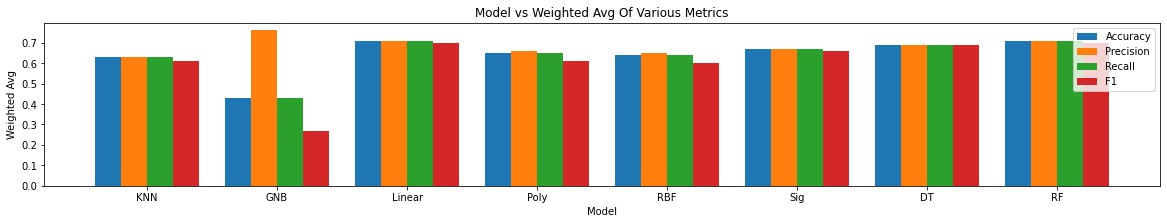

In [58]:
# Models
X = ['KNN', 'GNB', 'Linear', 'Poly', 'RBF', 'Sig', 'DT', 'RF']

# Collect this information from the classification reports and store them in lists
accuracy = [0.63, 0.43, 0.71, 0.65, 0.64, 0.67, 0.69, 0.71]
precision = [0.63, 0.76, 0.71, 0.66, 0.65, 0.67, 0.69, 0.71]
recall = [0.63, 0.43, 0.71, 0.65, 0.64, 0.67, 0.69, 0.71]
f1 = [0.61, 0.27, 0.70, 0.61, 0.60, 0.66, 0.69, 0.70]

# Number of bars
n_bars = len(X)

# Number of groups of bars (accuracy, precision, recall, f1)
n_groups = 4

# Total width for each group of bars
total_width = 0.8

# Width for each individual bar within a group
bar_width = total_width / n_groups

# Calculate the center positions for each group of bars
X_axis = np.arange(len(X))

# Calculate the left positions for each individual bar within a group
left_positions = X_axis - (total_width - bar_width) / 2

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20, 3)

# Plotting the bars for each metric using the left positions and respective data
plt.bar(left_positions, accuracy, bar_width, label='Accuracy')
plt.bar(left_positions + bar_width, precision, bar_width, label='Precision')
plt.bar(left_positions + bar_width * 2, recall, bar_width, label='Recall')
plt.bar(left_positions + bar_width * 3, f1, bar_width, label='F1')

# Setting the range of values for the X axis and labels
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()


In [59]:
import pickle
# Save the trained model and the scaler to files
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(rf, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
